In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Data Exploration

In [2]:
df = pd.read_csv("../input/water-potability/water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# Handle missing values

<AxesSubplot:>

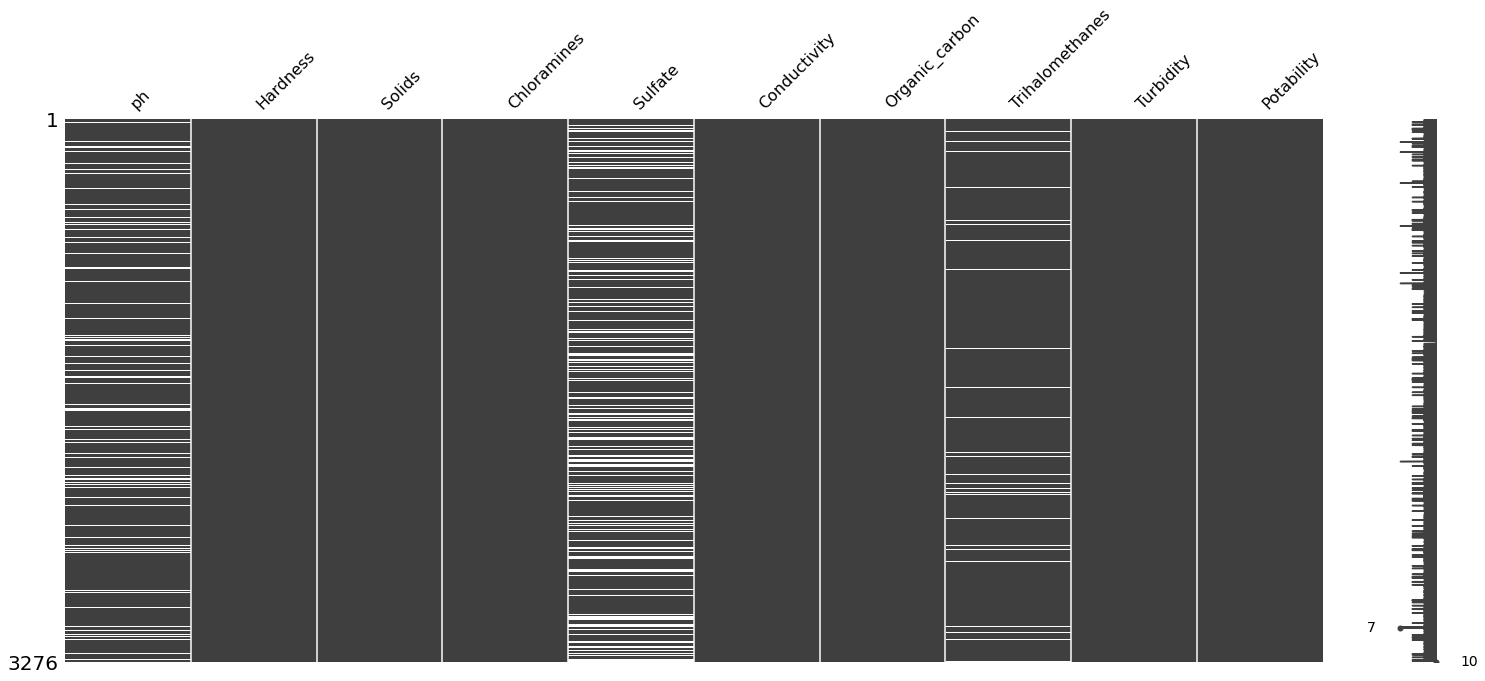

In [6]:
import missingno as msno
msno.matrix(df)

In [7]:
df.loc[df.ph.isna()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735264,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452646,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414927,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


In [8]:
df.loc[df.Sulfate.isna()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [9]:
df.loc[df.Trihalomethanes.isna()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


Remove rows with too many missing values:

In [10]:
df = df.drop(df[(df.ph.isna()) & (df.Sulfate.isna()) & (df.Trihalomethanes.isna())].index)
df = df.drop(df[(df.ph.isna()) & (df.Sulfate.isna())].index)
df = df.drop(df[(df.ph.isna()) & (df.Trihalomethanes.isna())].index)
df = df.drop(df[(df.Sulfate.isna()) & (df.Trihalomethanes.isna())].index)
df.loc[df.isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Fill missing values with the average value of the column:

In [11]:
df.fillna(df.mean(), inplace=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.078708,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.699670,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.699670,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3273,9.419510,175.762646,33155.578218,7.350233,333.699670,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.699670,402.883113,11.168946,77.488213,4.708658,1


# Round Numerical Values

In [12]:
df = round(df, 3)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.079,204.890,20791.319,7.300,368.516,564.309,10.380,86.991,2.963,0
1,3.716,129.423,18630.058,6.635,333.700,592.885,15.180,56.329,4.501,0
2,8.099,224.236,19909.542,9.276,333.700,418.606,16.869,66.420,3.056,0
3,8.317,214.373,22018.417,8.059,356.886,363.267,18.437,100.342,4.629,0
4,9.092,181.102,17978.986,6.547,310.136,398.411,11.558,31.998,4.075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.070,186.659,26138.780,7.748,345.700,415.887,12.068,60.420,3.670,1
3271,4.668,193.682,47580.992,7.167,359.949,526.424,13.894,66.688,4.436,1
3273,9.420,175.763,33155.578,7.350,333.700,432.045,11.039,69.845,3.299,1
3274,5.127,230.604,11983.869,6.303,333.700,402.883,11.169,77.488,4.709,1


## Explore Target Column - Potability

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [13]:
potabilities = df.Potability.sort_values().unique()
potabilities

array([0, 1])

The data is imbalanced:

Text(0.5, 1.0, 'Water distribution by potability')

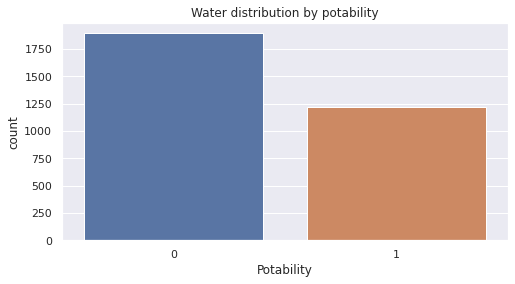

In [14]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x="Potability", data=df).set_title("Water distribution by potability")

In [15]:
(df.Potability.value_counts(normalize=True) * 100)

0    60.815148
1    39.184852
Name: Potability, dtype: float64

# Explore data columns

## PH

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards

[Text(0.5, 1.0, 'PH Boxplot')]

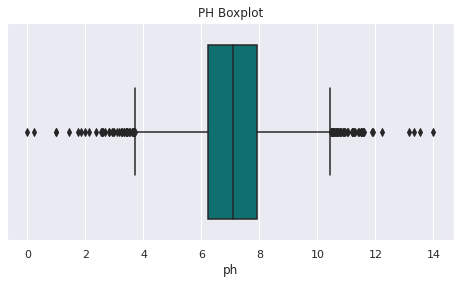

In [16]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df.ph, color='teal').set(title='PH Boxplot')

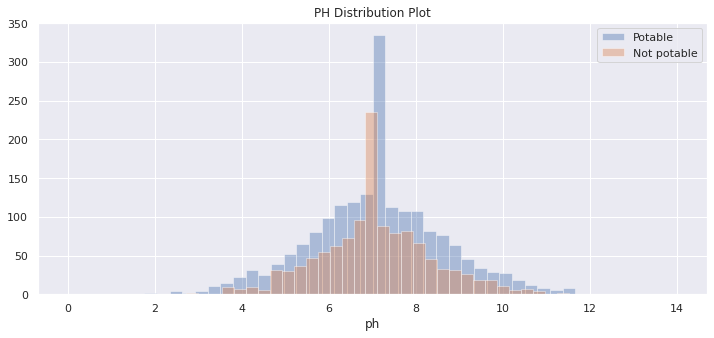

In [17]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df[df["Potability"] == 0]['ph'],  kde=False, label="Potable").set(title='PH Distribution Plot')
sns.distplot(df[df["Potability"] == 1]['ph'],  kde=False, label="Not potable")
plt.legend()

### Hardness

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

[Text(0.5, 1.0, 'Hardness Boxplot')]

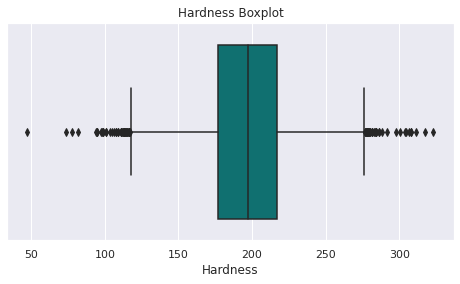

In [18]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df.Hardness, color='teal').set(title='Hardness Boxplot')

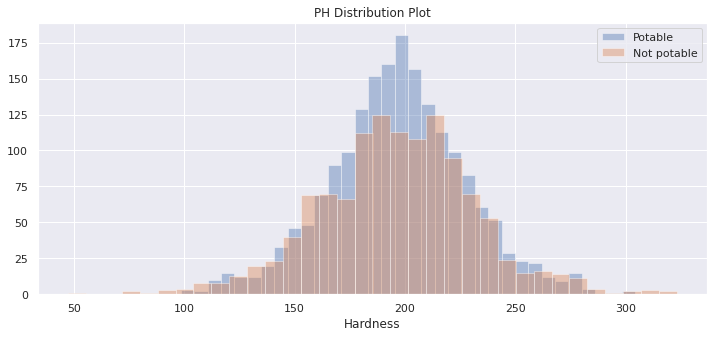

In [19]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df[df["Potability"] == 0]['Hardness'],  kde=False, label="Potable").set(title='PH Distribution Plot')
sns.distplot(df[df["Potability"] == 1]['Hardness'],  kde=False, label="Not potable")
plt.legend()

### Solids

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

[Text(0.5, 1.0, 'Solids Boxplot')]

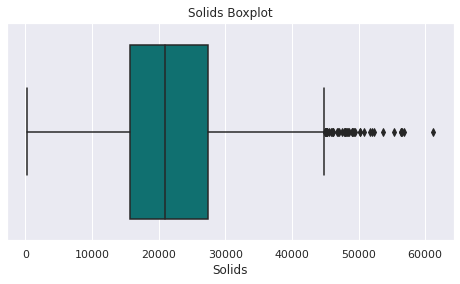

In [20]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df.Solids, color='teal').set(title='Solids Boxplot')

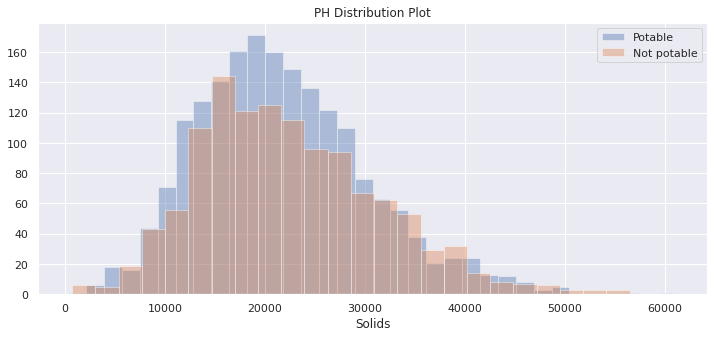

In [21]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df[df["Potability"] == 0]['Solids'],  kde=False, label="Potable").set(title='PH Distribution Plot')
sns.distplot(df[df["Potability"] == 1]['Solids'],  kde=False, label="Not potable")
plt.legend()

### Sulfate

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

[Text(0.5, 1.0, 'Sulfate Boxplot')]

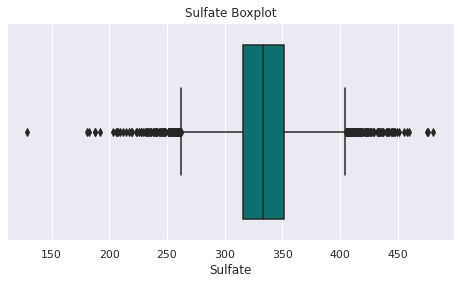

In [22]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df.Sulfate, color='teal').set(title='Sulfate Boxplot')

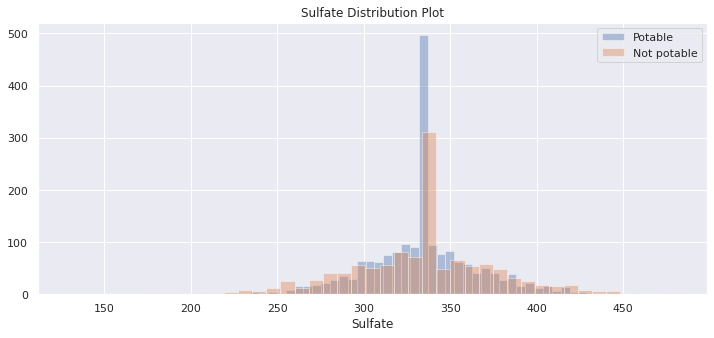

In [23]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df[df["Potability"] == 0]['Sulfate'],  kde=False, label="Potable").set(title='Sulfate Distribution Plot')
sns.distplot(df[df["Potability"] == 1]['Sulfate'],  kde=False, label="Not potable")
plt.legend()

### Conductivity

Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

[Text(0.5, 1.0, 'Conductivity Boxplot')]

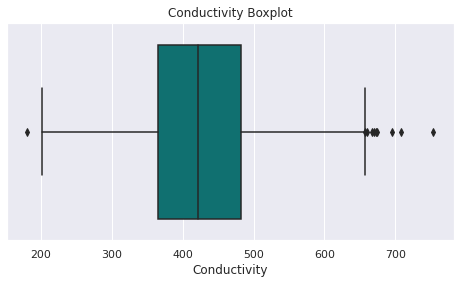

In [24]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df.Conductivity, color='teal').set(title='Conductivity Boxplot')

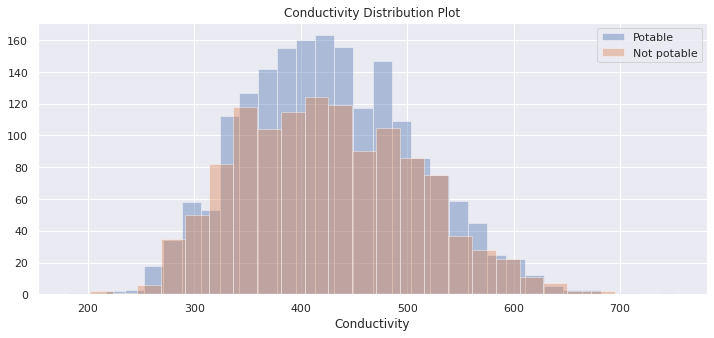

In [25]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df[df["Potability"] == 0]['Conductivity'],  kde=False, label="Potable").set(title='Conductivity Distribution Plot')
sns.distplot(df[df["Potability"] == 1]['Conductivity'],  kde=False, label="Not potable")
plt.legend()

### Organic carbon

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

[Text(0.5, 1.0, 'Organic Carbon Boxplot')]

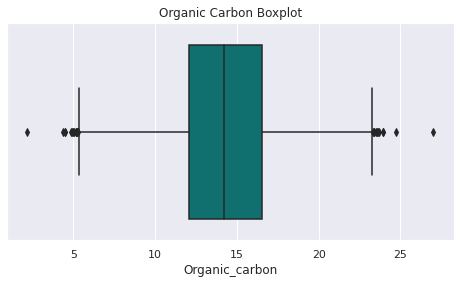

In [26]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df.Organic_carbon, color='teal').set(title='Organic Carbon Boxplot')

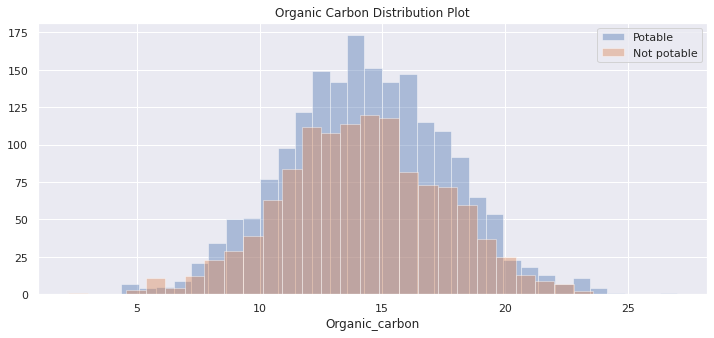

In [27]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df[df["Potability"] == 0]['Organic_carbon'],  kde=False, label="Potable").set(title='Organic Carbon Distribution Plot')
sns.distplot(df[df["Potability"] == 1]['Organic_carbon'],  kde=False, label="Not potable")
plt.legend()

### Trihalomethanes

THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

[Text(0.5, 1.0, 'Trihalomethanes Boxplot')]

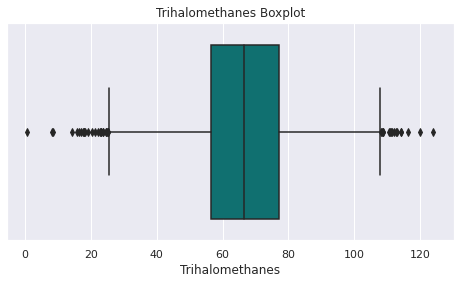

In [28]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df.Trihalomethanes, color='teal').set(title='Trihalomethanes Boxplot')

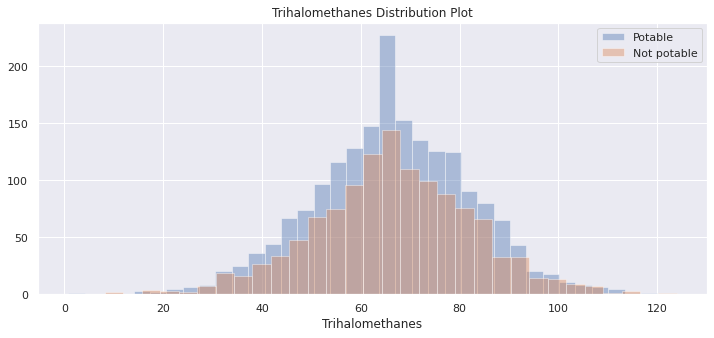

In [29]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df[df["Potability"] == 0]['Trihalomethanes'],  kde=False, label="Potable").set(title='Trihalomethanes Distribution Plot')
sns.distplot(df[df["Potability"] == 1]['Trihalomethanes'],  kde=False, label="Not potable")
plt.legend()

### Turbidity

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

[Text(0.5, 1.0, 'Turbidity Boxplot')]

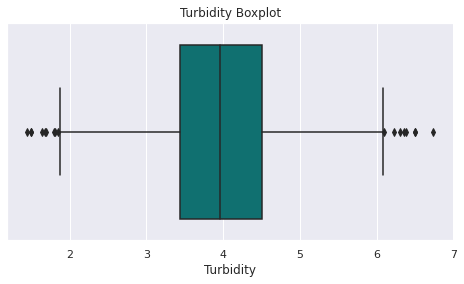

In [30]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df.Turbidity, color='teal').set(title='Turbidity Boxplot')

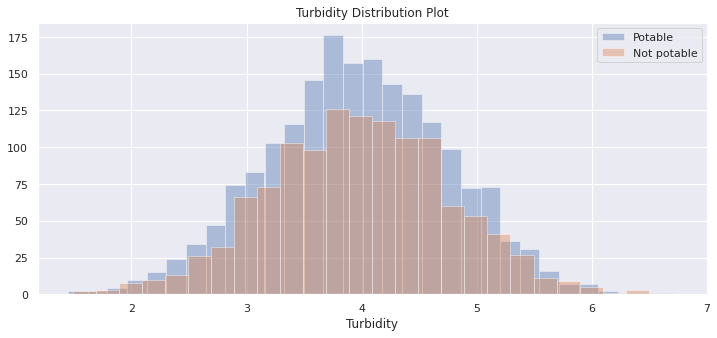

In [31]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df[df["Potability"] == 0]['Turbidity'],  kde=False, label="Potable").set(title='Turbidity Distribution Plot')
sns.distplot(df[df["Potability"] == 1]['Turbidity'],  kde=False, label="Not potable")
plt.legend()

# Correlaton

Correlation to 'Potability' value:
Potability         1.000000
Solids             0.040595
Organic_carbon    -0.028156
Chloramines        0.022130
Sulfate           -0.019230
Hardness          -0.011219
Turbidity          0.007175
Trihalomethanes    0.006256
Conductivity      -0.006168
ph                -0.003242
Name: Potability, dtype: float64


Text(0.5, 1.0, 'Water Potability Heatmap')

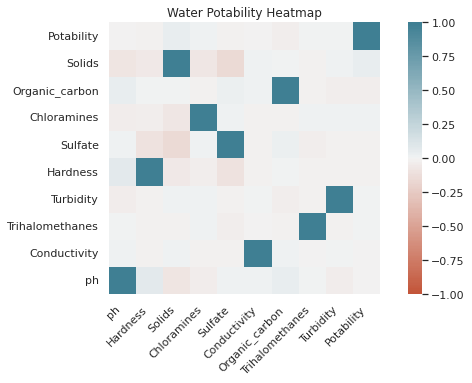

In [32]:
sns.set(rc={'figure.figsize':(10,5)})
corr = df.corr().sort_values(ascending=False, key=lambda x: abs(x), by="Potability")

print("Correlation to 'Potability' value:")
print (corr["Potability"])

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Water Potability Heatmap")

## Train a model

I used **Random Forest** classifier:

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from imblearn.ensemble import BalancedBaggingClassifier

df_train = df.drop(columns=["Potability"])
X_train, X_test, y_train, y_test = train_test_split(df_train, df["Potability"],test_size=0.2,shuffle=True, stratify=df["Potability"])

pipeline = make_pipeline(
    RandomForestClassifier(
        n_estimators=2000,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        max_depth=60,
        bootstrap=True,
        class_weight='balanced'
    ),
)
pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       379
           1       0.70      0.36      0.48       245

    accuracy                           0.69       624
   macro avg       0.69      0.63      0.63       624
weighted avg       0.69      0.69      0.66       624

Accuracy: 0.6875
